# **FACIAL EXPRESSION DETECTION**

---



Facial expression detection is a significant application of computer vision, involving the classification of facial expressions into predefined categories. This project focuses on creating a Convolutional Neural Network (CNN) to classify facial expressions into three classes: Happy, Sad, and Surprise. The project includes building the CNN model, training it with a dataset of facial images, and creating a user interface (UI) using Streamlit to facilitate interaction with the model.

In [ ]:
from skimage.io import imread
from skimage.transform import resize
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train=os.listdir('/content/drive/MyDrive/CNN Image Dataset/Face Expressions - Copy/train')

In [ ]:
test=os.listdir('/content/drive/MyDrive/CNN Image Dataset/Face Expressions - Copy/test')

In [ ]:
X_train=[]
y_train=[]
Categories = ['surprise', 'happy', 'sad']
datapath='/content/drive/MyDrive/CNN Image Dataset/Face Expressions - Copy/train'
for dir in Categories:
  dirpath=os.path.join(datapath,dir)
  images=os.listdir(dirpath)
  for img in images:
    imagepath=os.path.join(dirpath,img)
    image_arr=imread(imagepath)
    image_resize=resize(image_arr,(150,150,1))
    X_train.append(image_resize)
    y_train.append(Categories.index(dir))
  print("Loaded...",dir)

Loaded... surprise
Loaded... happy
Loaded... sad


In [ ]:
X_test=[]
y_test=[]
Categories = ['surprise', 'happy', 'sad']
datapath='/content/drive/MyDrive/CNN Image Dataset/Face Expressions - Copy/test'
for dir in Categories:
  dirpath=os.path.join(datapath,dir)
  images=os.listdir(dirpath)
  for img in images:
    imagepath=os.path.join(dirpath,img)
    image_arr=imread(imagepath)
    image_resize=resize(image_arr,(150,150,1))
    X_test.append(image_resize)
    y_test.append(Categories.index(dir))
  print("Loaded...",dir)

Loaded... surprise
Loaded... happy
Loaded... sad


In [ ]:
len(X_train),len(y_train)

(3072, 3072)

In [ ]:
len(X_test),len(y_test)

(617, 617)

In [ ]:
import numpy as np
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train.shape

(3072, 150, 150, 1)

In [ ]:
X_test.shape

(617, 150, 150, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(100,activation = 'relu'))
model.add(Dense(50,activation='relu'))

model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=16)

Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.4666 - loss: 0.9932
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7887 - loss: 0.5041
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8561 - loss: 0.3758
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9123 - loss: 0.2469
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9415 - loss: 0.1643
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9532 - loss: 0.1303
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9646 - loss: 0.1004
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9710 - loss: 0.0785
Epoch 9/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9817 - loss: 0.0563
Epoch 10/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9713 - loss: 0.0671
Epoch 11/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9821 - loss: 0.0553
Epoch 12/20
192/192 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test,y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7400 - loss: 1.8651


[1.886102318763733, 0.7390599846839905]

array([[[128, 123, 120],
        [128, 123, 120],
        [129, 124, 121],
        ...,
        [122, 117, 113],
        [121, 116, 110],
        [121, 116, 110]],

       [[128, 123, 120],
        [129, 124, 121],
        [130, 125, 122],
        ...,
        [122, 117, 113],
        [122, 117, 111],
        [122, 117, 111]],

       [[129, 124, 121],
        [130, 125, 122],
        [131, 126, 123],
        ...,
        [123, 118, 114],
        [123, 118, 112],
        [123, 118, 112]],

       ...,

       [[142, 141, 137],
        [143, 142, 138],
        [145, 144, 140],
        ...,
        [151, 152, 147],
        [151, 152, 147],
        [151, 152, 147]],

       [[142, 141, 137],
        [142, 141, 137],
        [144, 143, 139],
        ...,
        [150, 151, 146],
        [150, 151, 146],
        [150, 151, 146]],

       [[141, 140, 136],
        [142, 141, 137],
        [143, 142, 138],
        ...,
        [149, 150, 145],
        [149, 150, 145],
        [149, 150, 145]]], dtype=uint8)
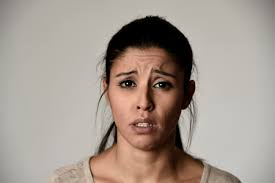

In [ ]:
imgpath='/content/drive/MyDrive/CNN Image Dataset/Face Expressions - Copy/Sad.jpeg'
img=imread(imgpath)
img

In [ ]:
img=resize(img,(150,150,1))

In [ ]:
img=img.reshape(1,150,150,1)
y_new=model.predict(img)
y_new

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


array([[8.6643553e-08, 1.3330067e-08, 9.9999988e-01]], dtype=float32)

In [ ]:
ind=y_new.argmax(axis=1)
ind

array([2])

In [ ]:
Categories[ind.item()]

'sad'

In [ ]:
model.save('Facial_Expression.h5')